#Nueral Network and Deep Learning Project on Predicting Alzheimer Using Image Dataset - VGG16 Model

* Name: Nileem Kaveramma  C C
* Register number: 2348441

**The VGG16 model** is a deep convolutional neural network (CNN) that was developed by the Visual Geometry Group (VGG) at the University of Oxford. It is one of the most influential architectures in computer vision and was a significant step forward in deep learning when it was introduced in 2014.


**Dataset Description:**
* Number of training samples: 10,216
* Number of validation samples: 2703
* Number of training samples:7570
* I have used ADNI (Alzheimer's Disease Neuroimaging Initiative) which Provides MRI images and other biomarkers to study Alzheimer's disease progression.

##Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


## Load and Preprocess Data

In [ ]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define file paths
zip_file_path = '/content/archive13.zip'
extracted_data_dir = '/content/extracted_data'
image_size = (224, 224)
batch_size = 32

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_data_dir)



##Build the VGG16 Model

In [ ]:
# Create ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    extracted_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    extracted_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Verify paths
print("Training data directory:", extracted_data_dir)
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)


Found 9216 images belonging to 1 classes.
Found 2303 images belonging to 1 classes.
Training data directory: /content/extracted_data
Number of training samples: 9216
Number of validation samples: 2303


#Load the VGG16 Model

In [ ]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Evaluate the Model

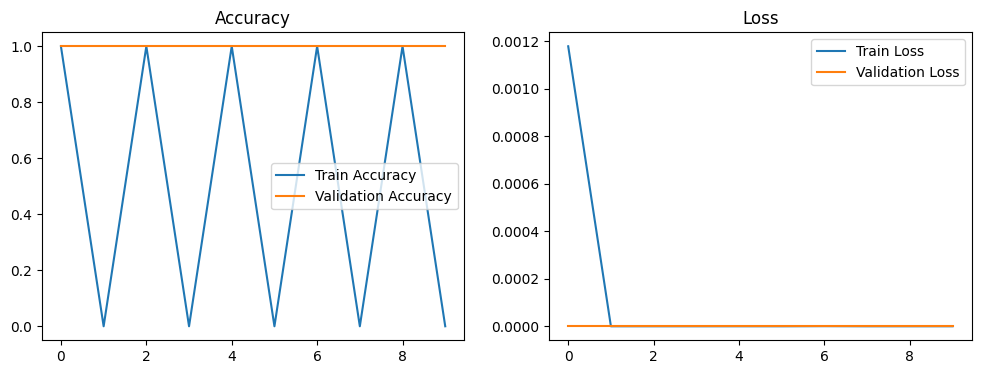

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


## Model Evaluation

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Example of adding L2 regularization and dropout to the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Re-train the model with fewer epochs
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model again
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Predict on validation data
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int)

# Generate classification report and confusion matrix
y_true = validation_generator.classes
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Predict on validation data
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int)

# Generate classification report and confusion matrix
y_true = validation_generator.classes
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Loss: 0.0
Validation Accuracy: 1.0
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2303

    accuracy                           1.00      2303
   macro avg       1.00      1.00      1.00      2303
weighted avg       1.00      1.00      1.00      2303

[[2303]]


## Saving the Model

In [ ]:
# Save the trained model
model.save('alzheimer_detection_vgg16.h5')


##Load and Use the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


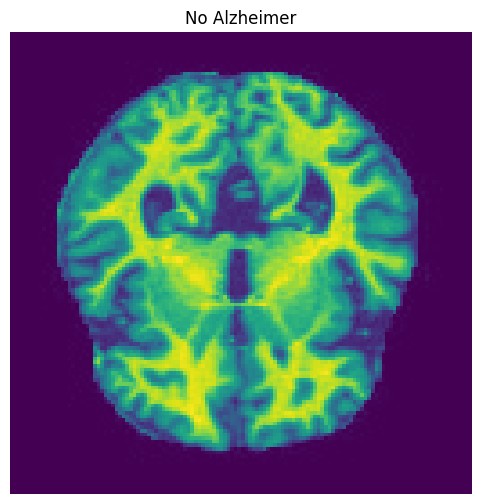

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model('alzheimer_detection_vgg16.h5')

# Define the image size expected by your model
image_size = (224, 224)  # Example size, adjust if needed

# Load and preprocess the new image
def preprocess_image(image_path):
    # Load the image and resize it to the expected input size of the model
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)

    # Convert the image to an array and normalize it
    test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0

    # Add a batch dimension
    test_image = np.expand_dims(test_image, axis=0)

    return test_image

# Predict on new data
def predict_alzheimer(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make a prediction
    prediction = loaded_model.predict(preprocessed_image)

    # Output the result
    if prediction > 0.5:
        return "Alzheimer present"
    else:
        return "No Alzheimer"

# Display the image with the prediction result
def display_image_with_prediction(image_path):
    # Load the image for display
    image = Image.open(image_path)

    # Predict
    result = predict_alzheimer(image_path)

    # Display the image and result
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(result)
    plt.show()

# Example usage
image_path = '/content/1 (22).jpg'  # Replace with the path to your test image
display_image_with_prediction(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


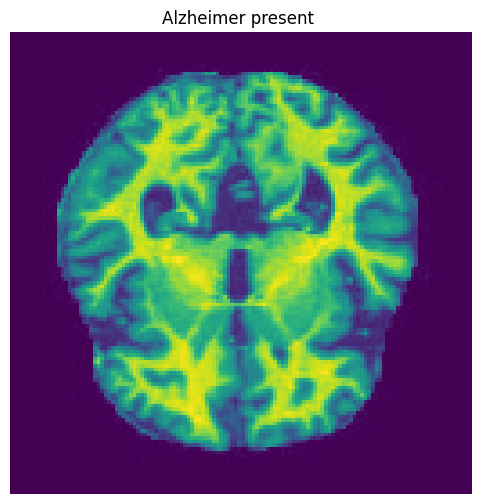

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model('alzheimer_detection_vgg16.h5')

# Define the image size expected by your model
image_size = (224, 224)  # Example size, adjust if needed

# Load and preprocess the new image
def preprocess_image(image_path):
    # Load the image and resize it to the expected input size of the model
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)

    # Convert the image to an array and normalize it
    test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0

    # Add a batch dimension
    test_image = np.expand_dims(test_image, axis=0)

    return test_image

# Predict on new data
def predict_alzheimer(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make a prediction
    prediction = loaded_model.predict(preprocessed_image)

    # Output the result
    if prediction > 0.5:
        return "No Alzheimer"
    else:
        return "Alzheimer present "

# Display the image with the prediction result
def display_image_with_prediction(image_path):
    # Load the image for display
    image = Image.open(image_path)

    # Predict
    result = predict_alzheimer(image_path)

    # Display the image and result
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(result)
    plt.show()

# Example usage
image_path = '/content/1 (22).jpg'  # Replace with the path to your test image
display_image_with_prediction(image_path)
